In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns

sns.set_context('paper')

In [3]:
x = np.linspace(-7, 7, 200)

In [4]:
# set mu and sigma parameters. 
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]


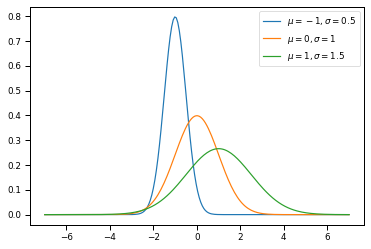

In [5]:
# loop & plot. 
# would be nice to do it with all combinations. 
for m, s in zip(mu_params, sd_params):
    y = stats.norm(m, s).pdf(x)
    plt.plot(x, y, label = f'$\mu = {m}, \sigma = {s}$')
    plt.legend()

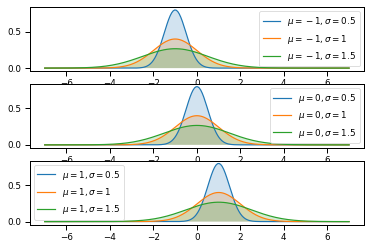

In [6]:
# and there it is. 
fix, axs = plt.subplots(3)

for sd in sd_params: 
    for num, mu in enumerate(mu_params): 
        y = stats.norm(mu, sd).pdf(x) #probability density function (continuous). 
        axs[num].plot(x, y, label = f'$\mu = {mu}, \sigma = {sd}$')
        axs[num].fill_between(x, y, alpha = 0.2)
        axs[num].legend()

# coinflip beta-binomial 

Bias: $\theta$ <br/>
Number of tosses: $N$ <br/>
Number of heads: $y$ <br/>
Likelihood of the random variable coin is generated using the pinomial distribution.

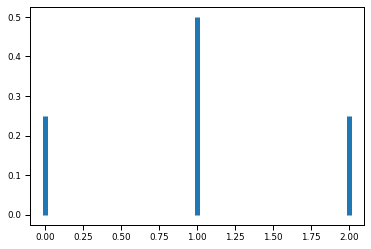

In [7]:
x = np.arange(0, 3)
y = stats.binom(n = 2, p = .5).pmf(x) #pmf = probability mass (discrete). 
plt.vlines(x, 0, y, lw = 5)

In [8]:
# beta distribution 
# only defined between 0 & 1 
# has two parameters

In [9]:
x = np.linspace(0, 1, 100)

In [10]:
y = stats.beta(a = 1, b = 1).pdf(x)

In [11]:
alpha_params = [0.5, 1, 2, 3]

beta_params = [0.5, 1, 2, 3]

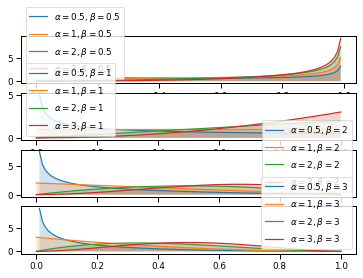

In [12]:
# would be nice to have 2x2 plots. 
fix, axs = plt.subplots(4)

for a in alpha_params: 
    for num, b in enumerate(beta_params): 
        y = stats.beta(a, b).pdf(x) #probability density function (continuous). 
        axs[num].plot(x, y, label = fr'$\alpha = {a}, \beta = {b}$')
        axs[num].fill_between(x, y, alpha = 0.2)
        axs[num].legend()

In [13]:
# bernoulli
true_theta = 0.5
N = 1
y = 0

# priors over the beta dist. 
alpha = 2
beta = 2

y += stats.bernoulli.rvs(0.5, size = N)[0]

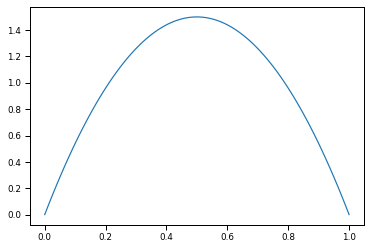

In [14]:
# plot before updating 
# low probability of high bias in the coin. 
plt.plot(x, stats.beta.pdf(x, alpha, beta))

In [15]:
p_theta_given_y = stats.beta.pdf(x, alpha + y, beta + N - y)

In [16]:
p_theta_given_y

array([0.00000000e+00, 1.18775759e-01, 2.32728262e-01, 3.41931714e-01,
       4.46460318e-01, 5.46388278e-01, 6.41789799e-01, 7.32739084e-01,
       8.19310336e-01, 9.01577761e-01, 9.79615562e-01, 1.05349794e+00,
       1.12329911e+00, 1.18909326e+00, 1.25095460e+00, 1.30895734e+00,
       1.36317568e+00, 1.41368382e+00, 1.46055597e+00, 1.50386633e+00,
       1.54368911e+00, 1.58009851e+00, 1.61316872e+00, 1.64297397e+00,
       1.66958845e+00, 1.69308636e+00, 1.71354191e+00, 1.73102930e+00,
       1.74562274e+00, 1.75739643e+00, 1.76642458e+00, 1.77278138e+00,
       1.77654105e+00, 1.77777778e+00, 1.77656578e+00, 1.77297926e+00,
       1.76709241e+00, 1.75897945e+00, 1.74871457e+00, 1.73637198e+00,
       1.72202589e+00, 1.70575050e+00, 1.68762000e+00, 1.66770861e+00,
       1.64609053e+00, 1.62283997e+00, 1.59803112e+00, 1.57173820e+00,
       1.54403540e+00, 1.51499692e+00, 1.48469699e+00, 1.45320978e+00,
       1.42060952e+00, 1.38697041e+00, 1.35236664e+00, 1.31687243e+00,
      

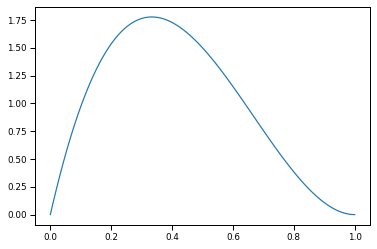

In [17]:
plt.plot(x, p_theta_given_y)

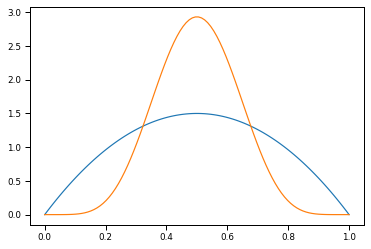

In [18]:
# more trials. 
N = 10

y = stats.bernoulli.rvs(0.5, size = N).sum()

alpha = 2
beta = 2

p_theta_given_y = stats.beta.pdf(x, alpha + y, beta + N - y)
plt.plot(x, stats.beta.pdf(x, alpha, beta))
plt.plot(x, p_theta_given_y)


In [19]:
# NEW DATA:
true_theta = 0.5
N = 10
y = 0

# priors over the beta dist. 
alpha = 0.5
beta = 2


In [25]:
import os
import imageio
filenames = []

for i in range(N):
    
    y += stats.bernoulli.rvs(0.5, size = N)[0]
    p_theta_given_y = stats.beta.pdf(x, alpha + y, beta + i - y)
    
    plt.fill_between(x, 0, p_theta_given_y, alpha = 0.5, label = str(i))
    plt.axvline(true_theta, ymax = 0.3)
    sns.despine()
    
    filename = f'{i}.png'
    filenames.append(filename)
    
    plt.savefig(filename)
    plt.close()

# make a gif
with imageio.get_writer('bayesToss.gif', mode = "I") as writer: 
    for filename in filename:
        image = imageio.imread(filename)
        write.append_data(image)
        
for filename in set(filenames):
    os.remove(filename)

FileNotFoundError: No such file: 'C:\Users\95\Documents\LegrandNico.github.io\BayesianBoys\Week2\9'